# Práctica II

## Obtención de los datos

### Funciones de utilidad

Importación de las librerías necesarias

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import bartlett
from scipy.stats import pearsonr
from scipy.stats import levene
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
def root_path( directory, file_name ):
    return '/home/jovyan/work/%s/%s.csv' % (directory, file_name )
    

Función **`export_dataframe`** que permite exportar el dataframe a fichero CSV

In [3]:
def export_dataframe( df, file_name, directory ):
    file = root_path( directory, file_name )
    df.to_csv(file )    
    

In [4]:
def read_dataframe( file_name, directory ):
    file = root_path( directory, file_name )
    return pd.read_csv(file )
    

In [5]:
def read_subdataframe( file_name ):
    return read_dataframe( 
        file_name = file_name,
        directory = 'subdataset' 
    ).iloc[ : , 1:]

### _DATASET I_: Precio de Gas doméstico en € por kw/h

Obtención de los datos del subdataset de los precios del gas doméstico: `data_gas_prices_household_consumers.csv`

Importación del subdataframe

In [6]:
data_gas_prices_household_consumers = read_subdataframe(
    file_name = 'data_gas_prices_household_consumers'
)

Columnas del dataset:

In [7]:
display( data_gas_prices_household_consumers.dtypes )

country          object
country_name     object
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
dtype: object

Se muestran los 10 primeros valores:

In [8]:
data_gas_prices_household_consumers.head( 10 )

,country,country_name,2017,2018,2019,2020,2021
0,AT,Austria,0.0299,0.0304,0.0312,0.0308,0.0316
1,BA,Bosnia and Herzegovina,0.0240,0.0240,0.0249,0.0258,0.0251
2,BE,Belgium,0.0283,0.0288,0.0289,0.0252,0.0315
3,BG,Bulgaria,0.0170,0.0209,0.0240,0.0177,0.0331
4,CZ,Czechia,0.0360,0.0390,0.0455,0.0431,0.0448
5,DE,Germany (until 1990 former territory of the FRG),NaN,NaN,0.0278,0.0292,0.0293
6,DK,Denmark,0.0234,0.0259,0.0209,0.0160,0.0415
7,EA,"Euro area (EA11-1999, EA12-2001, EA13-2007, EA...",0.0295,0.0303,0.0319,0.0302,0.0315
8,EE,Estonia,0.0234,0.0239,0.0253,0.0240,0.0361
9,EL,Greece,NaN,0.0311,0.0338,0.0258,0.0444


### _DATASET II_: Precio de Gas no doméstico en € por kw/h

Obtención de los datos del subdataset de los precios del gas no doméstico: `data_gas_prices_no_household_consumers.csv`

Importación del subdataframe

In [9]:
data_gas_prices_no_household_consumers = read_subdataframe(
    file_name = 'data_gas_prices_no_household_consumers'
)

Columnas del dataset:

In [10]:
display( data_gas_prices_no_household_consumers.dtypes )

country          object
country_name     object
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
dtype: object

Se muestran los 10 primeros valores:

In [11]:
data_gas_prices_no_household_consumers.head( 10 )

,country,country_name,2017,2018,2019,2020,2021
0,AT,Austria,NaN,NaN,0.0184,0.0168,0.0297
1,BA,Bosnia and Herzegovina,NaN,NaN,0.0257,0.0259,0.0248
2,BE,Belgium,NaN,NaN,0.0189,0.0148,0.0318
3,BG,Bulgaria,NaN,NaN,0.0213,0.0142,0.0299
4,CZ,Czechia,NaN,NaN,0.0226,0.0192,0.0259
5,DE,Germany (until 1990 former territory of the FRG),NaN,NaN,0.0196,0.0171,0.0262
6,DK,Denmark,0.0194,0.0234,0.0178,0.0137,0.0448
7,EA,"Euro area (EA11-1999, EA12-2001, EA13-2007, EA...",0.0220,0.0240,0.0211,0.0175,0.0278
8,EE,Estonia,NaN,NaN,0.0213,0.0155,0.0352
9,EL,Greece,NaN,NaN,0.0260,0.0165,0.0337


### _DATASET III_: Precio de la electricidad doméstica para la franja de 2.500 a 4.999 kWh

Obtención de los datos del subdataset del precio de la electricidad doméstica para la franja de 2.500 a 4.999 kWh `data_electricity_prices_household_consumers.csv`


Importación del subdataframe

In [12]:
data_electricity_prices_household_consumers = read_subdataframe(
    file_name = 'data_electricity_prices_household_consumers'
)

Columnas del dataset:

In [13]:
display( data_electricity_prices_household_consumers.dtypes )

country          object
country_name     object
2012-S2         float64
2013-S2         float64
2014-S2         float64
2015-S2         float64
2016-S2         float64
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
dtype: object

Se muestran los 10 primeros valores:

In [14]:
data_electricity_prices_household_consumers.head(10)

,country,country_name,2012-S2,2013-S2,2014-S2,2015-S2,2016-S2,2017,2018,2019,2020,2021
0,AL,Albania,NaN,NaN,NaN,NaN,NaN,0.0713,0.0759,0.0778,NaN,0.0781
1,AT,Austria,NaN,NaN,NaN,NaN,NaN,0.0613,0.0623,0.0687,0.0732,0.0745
2,BA,Bosnia and Herzegovina,NaN,NaN,NaN,NaN,NaN,0.0342,0.0338,0.0361,0.0365,NaN
3,BE,Belgium,NaN,NaN,NaN,NaN,NaN,0.0735,0.0808,0.0859,0.0786,0.0844
4,BG,Bulgaria,NaN,NaN,NaN,NaN,NaN,0.0575,0.0585,0.0558,0.0560,0.0608
5,CY,Cyprus,NaN,NaN,NaN,NaN,NaN,0.1036,0.1157,0.1241,0.1042,0.1094
6,CZ,Czechia,NaN,NaN,NaN,NaN,NaN,0.0541,0.0570,0.0690,0.0749,0.0979
7,DE,Germany (until 1990 former territory of the FRG),NaN,NaN,NaN,NaN,NaN,0.0686,0.0622,0.0581,0.0574,0.0803
8,DK,Denmark,NaN,NaN,NaN,NaN,NaN,0.0388,0.0503,0.0539,0.0409,0.0747
9,EA,"Euro area (EA11-1999, EA12-2001, EA13-2007, EA...",NaN,NaN,NaN,NaN,NaN,0.0760,0.0801,0.0727,0.0697,0.0898


### _DATASET IV_: Precio de la electricidad no doméstica

OObtención de los datos del subdataset del precio de la electricidad no doméstica `data_electricity_prices_no_household_consumers.csv`

Importación del subdataframe

In [15]:
data_electricity_prices_no_household_consumers = read_subdataframe(
    file_name = 'data_electricity_prices_no_household_consumers'
)

Columnas del dataset:

In [16]:
display( data_electricity_prices_no_household_consumers.dtypes )

country          object
country_name     object
2007-S2         float64
2008-S2         float64
2009-S2         float64
2010-S2         float64
2011-S2         float64
2012-S2         float64
2013-S2         float64
2014-S2         float64
2015-S2         float64
2016-S2         float64
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
dtype: object

Se muestran los 10 primeros valores:

In [17]:
data_electricity_prices_no_household_consumers.head( 10 )

,country,country_name,2007-S2,2008-S2,2009-S2,2010-S2,2011-S2,2012-S2,2013-S2,2014-S2,2015-S2,2016-S2,2017,2018,2019,2020,2021
0,AT,Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0598,0.0610,0.0654,0.0702,0.0723
1,BA,Bosnia and Herzegovina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0649,0.0621,0.0624,0.0648,NaN
2,BE,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0672,0.0624,0.0663,0.0745,0.0890
3,BG,Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0817,0.0810,0.0764,0.0730,0.1075
4,CY,Cyprus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1187,0.1240,0.1271,0.1055,0.1136
5,CZ,Czechia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0580,0.0602,0.0721,0.0811,0.0848
6,DE,Germany (until 1990 former territory of the FRG),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0468,0.0612,0.0525,0.0651,0.0707
7,DK,Denmark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0433,0.0514,0.0517,0.0426,0.0898
8,EA,"Euro area (EA11-1999, EA12-2001, EA13-2007, EA...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0757,0.0837,0.0794,0.0780,0.0893
9,EE,Estonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0406,0.0489,0.0516,0.0440,0.0850


## Análisis inicial y procesamiento de los datos

### Funciones de utilidad

Estimador utilizando la media **`median_estimator`**. Dentro de una columna del dataframe evalúa aquellos valores nulos y lo sustituye por la media de los valores que no lo son

In [18]:
def median_estimator( df, column ) :    
    median = df.loc[pd.notnull( df[column]), column].median()
    df[column].fillna(median,inplace=True)    
    return df    


Función **`show_boxplot`** que muestra el diagrama de caja de los valores de un dataframe


In [19]:
def show_boxplot( df ):
    sns.set_theme( style = "whitegrid" )
    ax = sns.boxplot( data = df )
    

Función **`init_outlier`**. Iializa el Outlier de una columna, inicializa a nulo el valor máximo de la columna

In [20]:
def init_outlier(df, column): 
    df.loc[
        df[column] == df[column].max(),
        column 
    ] = np.nan
    return df


### Datos de los costes del gas doméstico


Sustituimos NaN values por su media

In [21]:
GasPricesHousehold=data_gas_prices_household_consumers

GasPricesHousehold = median_estimator( GasPricesHousehold, '2021' )
GasPricesHousehold = median_estimator( GasPricesHousehold, '2020' )
GasPricesHousehold = median_estimator( GasPricesHousehold, '2019' )
GasPricesHousehold = median_estimator( GasPricesHousehold, '2018' )
GasPricesHousehold = median_estimator( GasPricesHousehold, '2017' )


Se muestran los 10 primeros valores:

In [22]:
display( GasPricesHousehold.head(10) )

,country,country_name,2017,2018,2019,2020,2021
0,AT,Austria,0.0299,0.0304,0.0312,0.0308,0.0316
1,BA,Bosnia and Herzegovina,0.0240,0.0240,0.0249,0.0258,0.0251
2,BE,Belgium,0.0283,0.0288,0.0289,0.0252,0.0315
3,BG,Bulgaria,0.0170,0.0209,0.0240,0.0177,0.0331
4,CZ,Czechia,0.0360,0.0390,0.0455,0.0431,0.0448
5,DE,Germany (until 1990 former territory of the FRG),0.0243,0.0254,0.0278,0.0292,0.0293
6,DK,Denmark,0.0234,0.0259,0.0209,0.0160,0.0415
7,EA,"Euro area (EA11-1999, EA12-2001, EA13-2007, EA...",0.0295,0.0303,0.0319,0.0302,0.0315
8,EE,Estonia,0.0234,0.0239,0.0253,0.0240,0.0361
9,EL,Greece,0.0243,0.0311,0.0338,0.0258,0.0444


Diagrama de caja para los diferentes años:

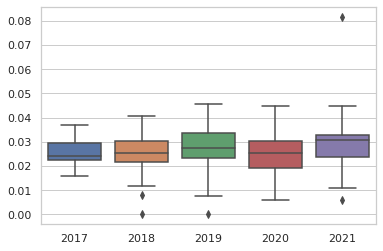

In [23]:
show_boxplot( GasPricesHousehold )

### Datos de los costes del gas para empresas


Sustituimos NaN values por su media

In [24]:
GasPricesNoHousehold = data_gas_prices_no_household_consumers

GasPricesNoHousehold = median_estimator( GasPricesNoHousehold, '2021' )
GasPricesNoHousehold = median_estimator( GasPricesNoHousehold, '2020' )
GasPricesNoHousehold = median_estimator( GasPricesNoHousehold, '2019' )
GasPricesNoHousehold = median_estimator( GasPricesNoHousehold, '2018' )
GasPricesNoHousehold = median_estimator( GasPricesNoHousehold, '2017' )

Se muestran los 10 primero valores:

In [25]:
display( GasPricesNoHousehold.head(10) )

,country,country_name,2017,2018,2019,2020,2021
0,AT,Austria,0.0220,0.0240,0.0184,0.0168,0.0297
1,BA,Bosnia and Herzegovina,0.0220,0.0240,0.0257,0.0259,0.0248
2,BE,Belgium,0.0220,0.0240,0.0189,0.0148,0.0318
3,BG,Bulgaria,0.0220,0.0240,0.0213,0.0142,0.0299
4,CZ,Czechia,0.0220,0.0240,0.0226,0.0192,0.0259
5,DE,Germany (until 1990 former territory of the FRG),0.0220,0.0240,0.0196,0.0171,0.0262
6,DK,Denmark,0.0194,0.0234,0.0178,0.0137,0.0448
7,EA,"Euro area (EA11-1999, EA12-2001, EA13-2007, EA...",0.0220,0.0240,0.0211,0.0175,0.0278
8,EE,Estonia,0.0220,0.0240,0.0213,0.0155,0.0352
9,EL,Greece,0.0220,0.0240,0.0260,0.0165,0.0337


Diagrama de caja para los diferentes años:

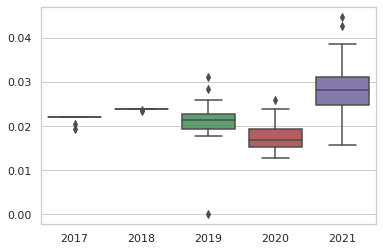

In [26]:
show_boxplot( GasPricesNoHousehold )

### Datos de los costes de la electricidad doméstica


Se eliminan las columnas correspondientes a los valores semestrales de lo años desde el 2012 al 2016 que no contienen datos

In [27]:
ElectPricesHouseholds = data_electricity_prices_household_consumers.drop(
    [
     '2012-S2',
     '2013-S2',
     '2014-S2',
     '2015-S2',
     '2016-S2'
    ], axis=1
)

Muestra de los 10 primeros valores

In [28]:
display( ElectPricesHouseholds.head( 10 ) )

,country,country_name,2017,2018,2019,2020,2021
0,AL,Albania,0.0713,0.0759,0.0778,NaN,0.0781
1,AT,Austria,0.0613,0.0623,0.0687,0.0732,0.0745
2,BA,Bosnia and Herzegovina,0.0342,0.0338,0.0361,0.0365,NaN
3,BE,Belgium,0.0735,0.0808,0.0859,0.0786,0.0844
4,BG,Bulgaria,0.0575,0.0585,0.0558,0.0560,0.0608
5,CY,Cyprus,0.1036,0.1157,0.1241,0.1042,0.1094
6,CZ,Czechia,0.0541,0.0570,0.0690,0.0749,0.0979
7,DE,Germany (until 1990 former territory of the FRG),0.0686,0.0622,0.0581,0.0574,0.0803
8,DK,Denmark,0.0388,0.0503,0.0539,0.0409,0.0747
9,EA,"Euro area (EA11-1999, EA12-2001, EA13-2007, EA...",0.0760,0.0801,0.0727,0.0697,0.0898


Se muestra el diagrama de caja

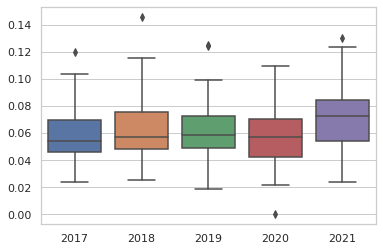

In [29]:
show_boxplot( ElectPricesHouseholds )

Detectamos Outlier en el año 2021, inicializamos valor

In [30]:
ElectPricesHouseholds = init_outlier(ElectPricesHouseholds, '2021')

 Estimamos valores nulos por la media

In [31]:
ElectPricesHouseholds = median_estimator( ElectPricesHouseholds, '2021' )
ElectPricesHouseholds = median_estimator( ElectPricesHouseholds, '2020' )
ElectPricesHouseholds = median_estimator( ElectPricesHouseholds, '2019' )
ElectPricesHouseholds = median_estimator( ElectPricesHouseholds, '2018' )
ElectPricesHouseholds = median_estimator( ElectPricesHouseholds, '2017' )


Se vuelve a mostrar el diagrama de caja

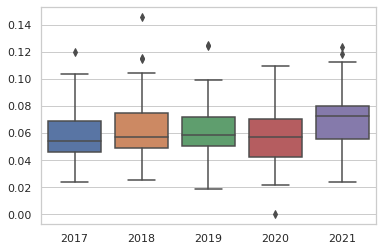

In [32]:
show_boxplot( ElectPricesHouseholds )

### Datos de los costes de la electricidad para empresas


Se eliminan las columnas correspondientes a los valores semestrales de lo años desde el 2012 al 2016 que no contienen datos

In [33]:
ElectPricesNoHouseholds = data_electricity_prices_no_household_consumers.drop(
    [
        '2007-S2',
        '2008-S2',
        '2009-S2',
        '2010-S2',
        '2011-S2',
        '2012-S2',
        '2013-S2',
        '2014-S2',
        '2015-S2',
        '2016-S2'
    ], axis=1
)

Se muestra el diagrama de caja

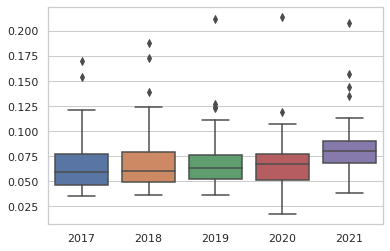

In [34]:
show_boxplot( ElectPricesNoHouseholds )

Muestra de los 10 primeros valores

In [35]:
display( ElectPricesNoHouseholds.head( 10 ) )

,country,country_name,2017,2018,2019,2020,2021
0,AT,Austria,0.0598,0.0610,0.0654,0.0702,0.0723
1,BA,Bosnia and Herzegovina,0.0649,0.0621,0.0624,0.0648,NaN
2,BE,Belgium,0.0672,0.0624,0.0663,0.0745,0.0890
3,BG,Bulgaria,0.0817,0.0810,0.0764,0.0730,0.1075
4,CY,Cyprus,0.1187,0.1240,0.1271,0.1055,0.1136
5,CZ,Czechia,0.0580,0.0602,0.0721,0.0811,0.0848
6,DE,Germany (until 1990 former territory of the FRG),0.0468,0.0612,0.0525,0.0651,0.0707
7,DK,Denmark,0.0433,0.0514,0.0517,0.0426,0.0898
8,EA,"Euro area (EA11-1999, EA12-2001, EA13-2007, EA...",0.0757,0.0837,0.0794,0.0780,0.0893
9,EE,Estonia,0.0406,0.0489,0.0516,0.0440,0.0850


Detectamos Outlier en los valores del 2021 y lo inicializamos 

In [36]:
ElectPricesHouseholds = init_outlier(ElectPricesNoHouseholds, '2021')

Se evaluan con el estimador de la media los valores nulos

In [37]:
ElectPricesNoHouseholds = median_estimator( ElectPricesNoHouseholds, '2021' )
ElectPricesNoHouseholds = median_estimator( ElectPricesNoHouseholds, '2020' )
ElectPricesNoHouseholds = median_estimator( ElectPricesNoHouseholds, '2019' )
ElectPricesNoHouseholds = median_estimator( ElectPricesNoHouseholds, '2018' )
ElectPricesNoHouseholds = median_estimator( ElectPricesNoHouseholds, '2017' )


Se vuelve a mostrar el diagrama de caja

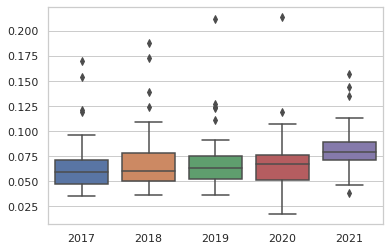

In [38]:
show_boxplot( ElectPricesNoHouseholds )

### _Conclusión de análisis inicial de datos:_

Descartamos continuar el análisis del "Gas" en el caso de los precios de los consumos de las empresas, ya que los datos obtenidos son una muestra demasiado pequeña, en concreto en los años 2017 y 2018 (ver dataset [data_gas_prices_no_household_consumers.csv](subdataset/data_gas_prices_no_household_consumers.csv)).

# Generación del dataset Final de trabajo

Generamos El Dataset final a exportar, con los datos posibles 

In [39]:
dElectCol = pd.merge(
    ElectPricesHouseholds, 
    ElectPricesNoHouseholds.drop(['country_name'], axis=1), 
    on='country',
    suffixes=('_ElectHouse', '_ElectNoHouse')
)

dGasCol = pd.merge(
    GasPricesHousehold.drop(['country_name'], axis=1), 
    GasPricesNoHousehold.drop(['country_name'], axis=1), 
    on='country',
    suffixes=('_GasHouse', '_GasNoHouse')
)

dEnergyCol = pd.merge(
    dElectCol, 
    dGasCol, 
    on='country'
)



Mostramos el dataset final a publicar:

In [40]:
dEnergyCol.head()

,country,country_name,2017_ElectHouse,2018_ElectHouse,2019_ElectHouse,2020_ElectHouse,2021_ElectHouse,2017_ElectNoHouse,2018_ElectNoHouse,2019_ElectNoHouse,...,2017_GasHouse,2018_GasHouse,2019_GasHouse,2020_GasHouse,2021_GasHouse,2017_GasNoHouse,2018_GasNoHouse,2019_GasNoHouse,2020_GasNoHouse,2021_GasNoHouse
0,AT,Austria,0.0598,0.0610,0.0654,0.0702,0.0723,0.0598,0.0610,0.0654,...,0.0299,0.0304,0.0312,0.0308,0.0316,0.022,0.024,0.0184,0.0168,0.0297
1,BA,Bosnia and Herzegovina,0.0649,0.0621,0.0624,0.0648,0.0793,0.0649,0.0621,0.0624,...,0.0240,0.0240,0.0249,0.0258,0.0251,0.022,0.024,0.0257,0.0259,0.0248
2,BE,Belgium,0.0672,0.0624,0.0663,0.0745,0.0890,0.0672,0.0624,0.0663,...,0.0283,0.0288,0.0289,0.0252,0.0315,0.022,0.024,0.0189,0.0148,0.0318
3,BG,Bulgaria,0.0817,0.0810,0.0764,0.0730,0.1075,0.0817,0.0810,0.0764,...,0.0170,0.0209,0.0240,0.0177,0.0331,0.022,0.024,0.0213,0.0142,0.0299
4,CZ,Czechia,0.0580,0.0602,0.0721,0.0811,0.0848,0.0580,0.0602,0.0721,...,0.0360,0.0390,0.0455,0.0431,0.0448,0.022,0.024,0.0226,0.0192,0.0259


Columnas del dataset a Publicar:

In [41]:
display( dEnergyCol.dtypes )

country               object
country_name          object
2017_ElectHouse      float64
2018_ElectHouse      float64
2019_ElectHouse      float64
2020_ElectHouse      float64
2021_ElectHouse      float64
2017_ElectNoHouse    float64
2018_ElectNoHouse    float64
2019_ElectNoHouse    float64
2020_ElectNoHouse    float64
2021_ElectNoHouse    float64
2017_GasHouse        float64
2018_GasHouse        float64
2019_GasHouse        float64
2020_GasHouse        float64
2021_GasHouse        float64
2017_GasNoHouse      float64
2018_GasNoHouse      float64
2019_GasNoHouse      float64
2020_GasNoHouse      float64
2021_GasNoHouse      float64
dtype: object

## Exportación dataset Final en formato CSV

In [42]:
export_dataframe( 
    df = dEnergyCol, 
    file_name = 'energy_price_dataset', 
    directory = 'dataset' 
) 

# Dataset a analizar a partir del dataset publicado

De las conclusiones del anterior estudio vemos que no hay suficientes datos en los datos relativos al precio del gas de las empresas para poder hacer un análisis. Decimos entonces continuar sólo con los datos que hacen referencia a los precios del gas y de la electricidad relativos a entornos domésticos.

Costruimos un dataset filtrando solo estos datos, eliminando los datos relativos al precio del gas y a la electricidad de las empresas en el dataset original y también se eliminan los datos acumulados relativos a la Unión Europea:

In [43]:
dEnergyHouseCol = dEnergyCol.loc[
                  : ,~dEnergyCol.columns.str.endswith('NoHouse')
                ].loc[
                  (dEnergyCol["country"] != "EU27_2020" )
                ].loc[
                  (dEnergyCol["country"] != "EA" )
                ]

Columnas del dataset a Analizar:

In [44]:
display( dEnergyHouseCol.dtypes )

country             object
country_name        object
2017_ElectHouse    float64
2018_ElectHouse    float64
2019_ElectHouse    float64
2020_ElectHouse    float64
2021_ElectHouse    float64
2017_GasHouse      float64
2018_GasHouse      float64
2019_GasHouse      float64
2020_GasHouse      float64
2021_GasHouse      float64
dtype: object

Se presenta una muestra del dataset filtrando sólamente los datos domésticos

In [45]:
display( dEnergyHouseCol.head() )

,country,country_name,2017_ElectHouse,2018_ElectHouse,2019_ElectHouse,2020_ElectHouse,2021_ElectHouse,2017_GasHouse,2018_GasHouse,2019_GasHouse,2020_GasHouse,2021_GasHouse
0,AT,Austria,0.0598,0.0610,0.0654,0.0702,0.0723,0.0299,0.0304,0.0312,0.0308,0.0316
1,BA,Bosnia and Herzegovina,0.0649,0.0621,0.0624,0.0648,0.0793,0.0240,0.0240,0.0249,0.0258,0.0251
2,BE,Belgium,0.0672,0.0624,0.0663,0.0745,0.0890,0.0283,0.0288,0.0289,0.0252,0.0315
3,BG,Bulgaria,0.0817,0.0810,0.0764,0.0730,0.1075,0.0170,0.0209,0.0240,0.0177,0.0331
4,CZ,Czechia,0.0580,0.0602,0.0721,0.0811,0.0848,0.0360,0.0390,0.0455,0.0431,0.0448


# Análisis de los datos

## Selección del grupo de datos

Teniendo por un lado un histórico de los precios de la electricidad y por otro los precios del gas por cada país. Se pretende hacer un estudio de la relación que existe entre ambos precios.

Para ello se procesa el dataset de los datos de precios de la energia doméstico para que cada registro tenga la información del país, del año y ambos precios

### Crear el dataset de trabajo

Primero se crea una función`reduce_dataset` que permite añadir los precios de la electricidad y del gas. Cada registro tendrá la información del país, del año que se pasa como argumento, al que se refieren los precios, y las columnas del precio del gas y la electricidad. 

In [46]:
def reduce_dataset( original_df, year ):
    # Nombre de las columnas de la electricidad y gas del año pasado por argumento
    column_name_electricity =  '%s_ElectHouse' % year
    column_name_gas =  '%s_GasHouse' % year 
    # Se obtiene las columnas relacionas con el país, el precio de la electricidad y el gas
    df =  original_df.loc[:,['country', column_name_electricity , column_name_gas]]
    # Se añade la columna del año
    df['Year'] = year    
    # Se renombran las columnas de electricidad y gas por precio de electricidad y gas respectivamente
    return df.rename(
        columns= { 
                    column_name_electricity: "ElectricityPrice", 
                    column_name_gas        : "GasPrice"  
                 }
    )

Se concatenan todos los años para crear el dataset de trabajo. También se resetea el índice del dataframe creado.

In [47]:
df_work = pd.concat(    
    [
        reduce_dataset( dEnergyHouseCol, 2017 ),
        reduce_dataset( dEnergyHouseCol, 2018 ),
        reduce_dataset( dEnergyHouseCol, 2019 ),
        reduce_dataset( dEnergyHouseCol, 2020 ),
        reduce_dataset( dEnergyHouseCol, 2021 )
    ]
)

df_work.reset_index(drop=True, inplace=True)

Se muestra los tipos de las columnas del dataset

In [48]:
display( df_work.dtypes )

country              object
ElectricityPrice    float64
GasPrice            float64
Year                  int64
dtype: object

Se muestra un ejemplo de los datos del dataset de trabajo que consta de 160 registros

In [49]:
display( df_work )

,country,ElectricityPrice,GasPrice,Year
0,AT,0.0598,0.0299,2017
1,BA,0.0649,0.0240,2017
2,BE,0.0672,0.0283,2017
3,BG,0.0817,0.0170,2017
4,CZ,0.0580,0.0360,2017
...,...,...,...,...
155,SI,0.0641,0.0264,2021
156,SK,0.0725,0.0195,2021
157,TR,0.0518,0.0110,2021
158,UA,0.0793,0.0306,2021


#### Diagrama de dispersión entre los precios de la electricidad y el gas

Para comprobar la dependencia y la correlación entre los precios de la electricidad y el gas de manera gráfica, se muestra el diagrama de dispersión.

Para ello se crean dos funciones, `dispersion_graph` que permite la generación del diagrama de dispersión del precio de la electricidad con respecto del gas y `dispersion_graph` que permite generar todos los diagramas de los registros por año.

Para este filtrado se utiliza la función `filter_by_year` que filtra los datos del dataset de trabajo de un año determinado. Esta función se usará en pasos posteriores.

In [50]:
def filter_by_year( df, year ):
    return df.loc[(df.Year == year)]

def dispersion_graph( df, title, ax ):
    df.plot(kind='scatter', x ="GasPrice", y = "ElectricityPrice",  color = "blue", ax = ax)
    plt.title( title  )
    
def dispersion_graph_by_year( df_work, ncolumns = 2 ):
    years = df_work.Year.unique()
    ntotal = len( years  )
    nrows = ntotal //  ncolumns
    nrows = nrows if ( ntotal %  ncolumns == 0 ) else  nrows + 1
    index = 1
    for yr in years: 
        ax1 = plt.subplot(nrows, ncolumns, index )
        dispersion_graph( filter_by_year( df_work, yr ), title= "Year %s" % yr, ax = ax1 )
        index = index + 1

Diagrama de dispersión del precio de la electricidad con respecto al gas para cada año del dataset

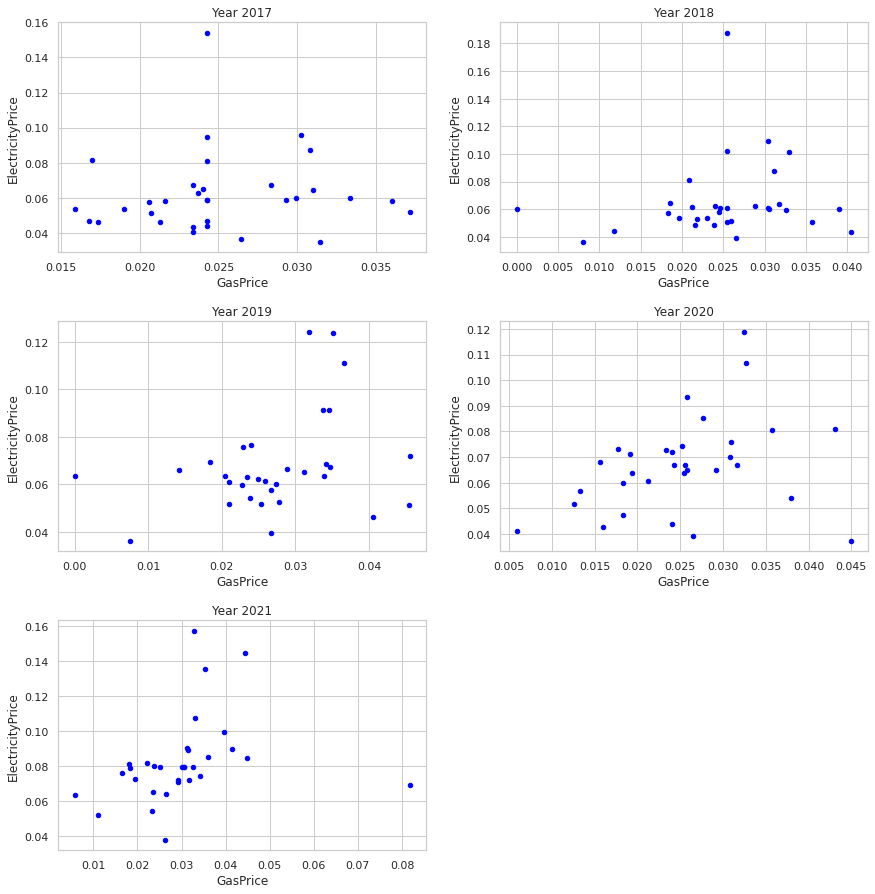

In [51]:
dispersion_graph_by_year( df_work )
plt.subplots_adjust( wspace = 0.2, hspace= 0.3, right = 2, top = 3)
plt.show()

Se crea el diagrama también para todos los registros sin filtrar por año.

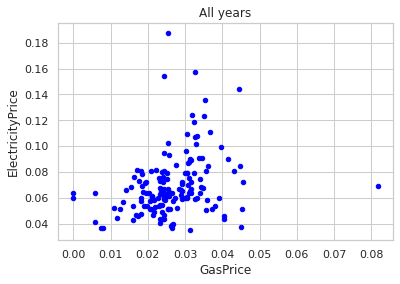

In [52]:
dispersion_graph( df_work, title= "All years", ax = None )
plt.show()

Como se puede apreciar en cada uno de los gráficos anteriores, hay una distribución uniforme y no se intuye una dependencia y correlación entre los dos precios.

#### Valores de los precios de la electricidad

Se crea una función de utilidad `get_electricityPrice` que permitirá obtener los datos de la electricidad a partir de un datafra en el formato necesario para poder ejecutar las funciones de modelos en pasos posteriores.

In [53]:
def get_electricityPrice( df ):    
    return df.loc[:, "ElectricityPrice"].to_numpy() 

display( get_electricityPrice( df_work ) )


array([0.0598 , 0.0649 , 0.0672 , 0.0817 , 0.058  , 0.0468 , 0.0433 ,
       0.0406 , 0.081  , 0.1541 , 0.0641 , 0.05895, 0.0574 , 0.0536 ,
       0.0959 , 0.0949 , 0.0461 , 0.0581 , 0.0515 , 0.0675 , 0.0517 ,
       0.05895, 0.0629 , 0.0599 , 0.0468 , 0.0364 , 0.0348 , 0.044  ,
       0.0464 , 0.0533 , 0.05895, 0.0871 , 0.061  , 0.0621 , 0.0624 ,
       0.081  , 0.0602 , 0.0612 , 0.0514 , 0.0489 , 0.0876 , 0.1877 ,
       0.0636 , 0.0364 , 0.0613 , 0.0573 , 0.1091 , 0.1022 , 0.0488 ,
       0.058  , 0.054  , 0.0646 , 0.0505 , 0.0602 , 0.0609 , 0.0593 ,
       0.0539 , 0.0389 , 0.0434 , 0.051  , 0.0526 , 0.0446 , 0.0602 ,
       0.1015 , 0.0654 , 0.0624 , 0.0663 , 0.0764 , 0.0721 , 0.0525 ,
       0.0517 , 0.0516 , 0.0912 , 0.1242 , 0.0685 , 0.0363 , 0.0756 ,
       0.0695 , 0.1236 , 0.1112 , 0.0542 , 0.0615 , 0.0597 , 0.0609 ,
       0.0515 , 0.0636 , 0.0602 , 0.0674 , 0.0636 , 0.0395 , 0.0462 ,
       0.0577 , 0.0633 , 0.066  , 0.0636 , 0.0912 , 0.0702 , 0.0648 ,
       0.0745 , 0.07

#### Valores de los precios del gas

Se crea la función `get_gasPriceValues` similar a la anterior pero en este caso extrayendo los precios del gas.


In [54]:
def get_gasPriceValues( df ):    
    return df.loc[:, "GasPrice"].to_numpy() 

display( get_gasPriceValues( df_work ) )


array([0.0299 , 0.024  , 0.0283 , 0.017  , 0.036  , 0.0243 , 0.0234 ,
       0.0234 , 0.0243 , 0.0243 , 0.031  , 0.0243 , 0.0206 , 0.019  ,
       0.0302 , 0.0243 , 0.0174 , 0.0216 , 0.0207 , 0.0234 , 0.0371 ,
       0.0293 , 0.0237 , 0.0333 , 0.0168 , 0.0264 , 0.0314 , 0.0243 ,
       0.0213 , 0.0159 , 0.0243 , 0.0308 , 0.0304 , 0.024  , 0.0288 ,
       0.0209 , 0.039  , 0.0254 , 0.0259 , 0.0239 , 0.0311 , 0.0254 ,
       0.0317 , 0.008  , 0.0212 , 0.0183 , 0.0304 , 0.0254 , 0.0216 ,
       0.0245 , 0.023  , 0.0186 , 0.0357 , 0.0305 , 0.0246 , 0.0326 ,
       0.0197 , 0.0266 , 0.0405 , 0.0255 , 0.0218 , 0.0118 , 0.     ,
       0.0329 , 0.0312 , 0.0249 , 0.0289 , 0.024  , 0.0455 , 0.0278 ,
       0.0209 , 0.0253 , 0.0338 , 0.0318 , 0.0342 , 0.0075 , 0.0229 ,
       0.0184 , 0.0351 , 0.0366 , 0.0238 , 0.0258 , 0.0227 , 0.021  ,
       0.0454 , 0.0339 , 0.0274 , 0.0347 , 0.0204 , 0.0267 , 0.0405 ,
       0.0267 , 0.0234 , 0.0142 , 0.     , 0.0346 , 0.0308 , 0.0258 ,
       0.0252 , 0.01

## Análisis de la normalidad y homogeneidad de la varianza

### Normalidad

#### Análisis gráfico Otro enfoque

In [55]:
def quartil_quartil_graph( data, title, ax ):    
     sm.qqplot( data, line='q', ax = ax )
     plt.title( title )   

def draw_grap_quartil_quartil( df, title ):
    electricityPriceValues = df.loc[:, "ElectricityPrice"].to_numpy() 
    gasPriceValues = df.loc[:, "GasPrice"].to_numpy()
    ax1 = plt.subplot( 1, 2, 1 )
    quartil_quartil_graph( electricityPriceValues, "%s Electricy Prices" % title, ax1 ) 
    ax2 = plt.subplot( 1, 2, 2 ) 
    
    quartil_quartil_graph( gasPriceValues, "%s Gas Prices" % title, ax2 )
    plt.subplots_adjust(left=-1)
    plt.show()
    
def draw_grap_quartil_quartil_by_year( df ):
    years = df.Year.unique() 
    for yr in years :
        current_df = filter_by_year( df, yr )
        draw_grap_quartil_quartil( current_df, yr )


Diagramas cuartil-cuartil de los precios de la electricidad y del gas para todos los años

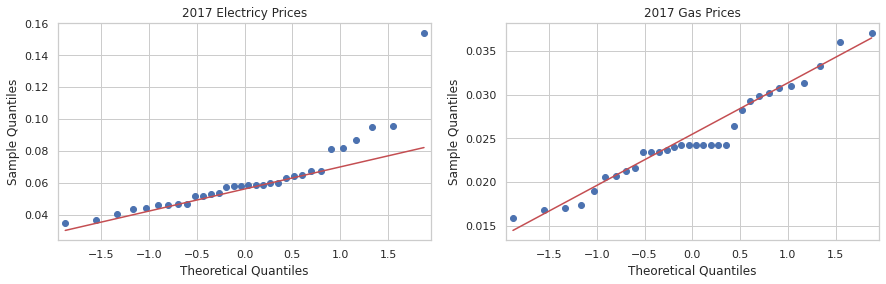

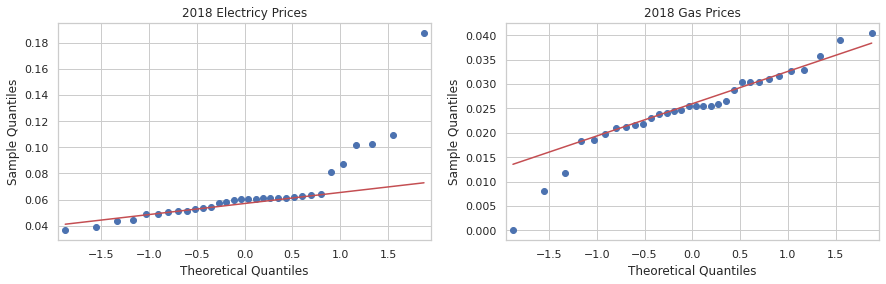

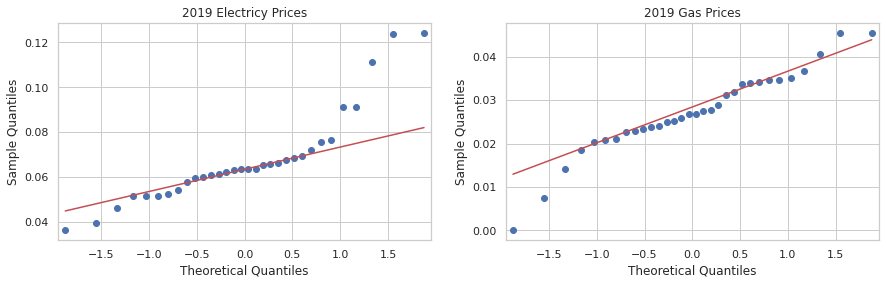

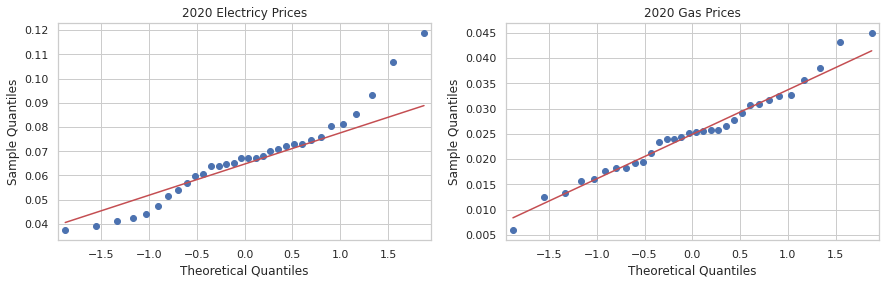

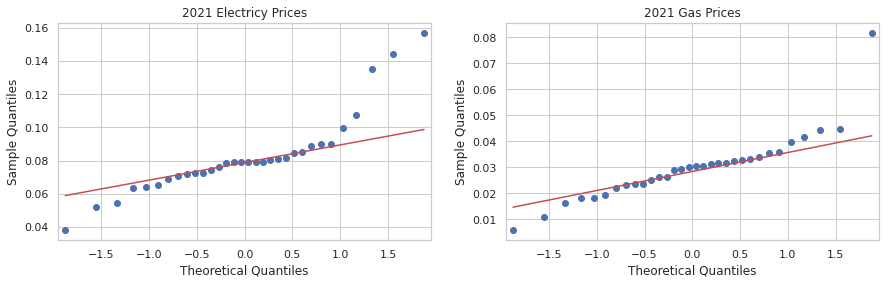

In [56]:
draw_grap_quartil_quartil_by_year( df_work )

Diagramas cuartil-cuartil de los precios de la electricidad y del gas para todos los años

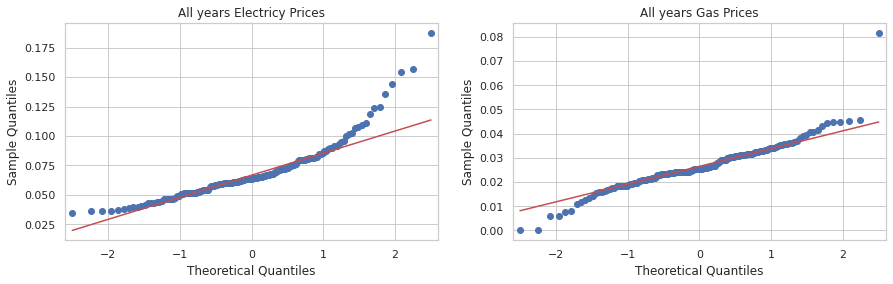

In [57]:
draw_grap_quartil_quartil( df_work, "All years" )

#### Análisis gráfico

Se crean los gráficos cuartil-cuartil para ver cuanto se aproximan a la normalidad ambas distribuciones

##### **Precios de la electricidad**

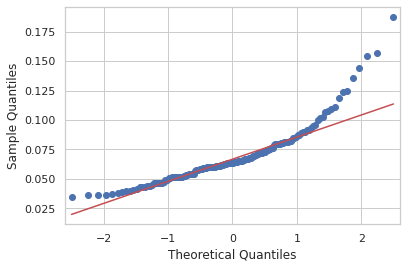

In [58]:
sm.qqplot( get_electricityPrice( df_work ) , line='q' )

plt.show()

Se puede ver que en los valores centrales si que se ajusta a una distribución normal pero no en el resto de la curva.

##### **Precios del gas**

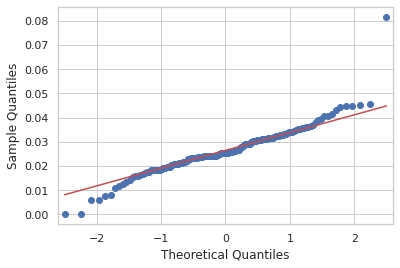

In [59]:
fig2 = sm.qqplot( get_gasPriceValues( df_work ), line='q' )
plt.show()

Aunque menos acusado que el caso de los precios de la electricidad, también se puede ver que en los valores centrales si que se ajusta a una distribución normal pero no en el resto de la curva.

#### Test de Shapiro-Wilk Otro enfoque

In [60]:
def test_shapiroWilk( values ):
    st, pvalue = stats.shapiro( values )
    print(  "  Test Shapiro-Wil" )
    if pvalue >= 0.05 :
        print( "   La muestra proviene de una población normalmente distribuida\n    (p-value = %s, stats = %s)" %(  pvalue, st ) )
        return True
    else: 
        print( "   La muestra NO proviene de una población normalmente distribuida\n    (p-value = %s, stats = %s)" %(  pvalue, st ) )
        return False

#### Test de Shapiro-Wilk

Los valores de los precios de la electricidad son valores continuos por lo que primeros se comprobará la normalidad de ambas muestras gracias al test de  Shapiro-Wilk.

El test de Shapiro-Will:

> **Hipótesis nula** `H_0`: _La muestra proviene de una población normalmente distribuida_.   
  **Hipótesis alternativa** `H_1`: _La muestra **no** proviene de una población normalmente distribuida_


##### **Precios de la electricidad**

In [61]:
stats.shapiro( get_electricityPrice( df_work ) )

ShapiroResult(statistic=0.8568865656852722, pvalue=3.429784928288271e-11)

Al ser el valor `p-value` menor que el nivel de significación `α = 0,05`, podemos **rechazar la hipétesis nula** y concluir que la distribución de los precios de la electricidad doméstica **no** sigue una distribución normal.

##### **Precios del gas**

In [62]:
stats.shapiro( get_gasPriceValues( df_work ) )

ShapiroResult(statistic=0.9196622967720032, pvalue=9.427189695543348e-08)

Igual que en el caso de la electricidad el p-value es menor que el nivel de significación 

    p-value = 9,427e-08 < α, α = 0,05
    
por lo que se puede deducir que los precios los precios del gas doméstico **no** siguen un distribución normal.

### Aplicación Teorema del límite central otro enfoque

In [63]:
def isApply_central_limit_theorem( values ):    
    print(  "  Test Central Limit Theorem" )
    if  len( values) > 30 :
        print( "   La muestra tiende a una distribución normal")
        return True
    else: 
        print( "   La muestra NO tiende a una distribución normal")
        return False  


### Aplicación Teorema del límite central

Este teorema establece que el contraste de hipótesis sobre la media de una muestra se aproxima a una distribución normal aunque la población original no siga una distribución normal, siempre que el tamaño de la muestra n sea suficientemente grande. Por suficientemente grande, se suele contemplar superior a 30 elementos, `n > 30`.

Ya que el número de registros es 160 podemos aplicar el teorema del límite central y considerar que la distribución de valores, tanto de la electricidad como del gas doméstico que si **se aproximan a una distribución normal**, aunque por el test de Shapiro no cumplan la normalidad.

### Comprobar normalidad (otro enfoque)

In [64]:
def check_normality( values ):
    return test_shapiroWilk( values ) or isApply_central_limit_theorem( values )

def execute_test_normality( df, title ):
    
    def execute( values ):
        res = check_normality( values )
        print( " > ¿Es una población normalmente distribuida?: %s" % res )
        return res
    
    result = {}
        
    print( title )
    print( " --- ---" )
    print( " - Electricity price:" )
    result["Electricity"] = execute( get_electricityPrice( df ) )
    print( " --- ---" )
    print( " - Gas price:" )
    result["Gas"] = execute( get_gasPriceValues( df ) )
    print( " --- --- --- --- --- --- " )   
    return result

def check_normality_by_year( df ):
    years = df.Year.unique() 
    result = {}
    for yr in years :
        current_df = filter_by_year( df, yr )
        res = execute_test_normality( current_df, "* Test normality poblation prices year %s" % yr )
        result[yr] = res
    return result
        

Se comprueba la normalidad de los precios de la electricidad y gas por cada año del dataset

In [65]:
check_normality_by_year( df_work )

* Test normality poblation prices year 2017
 --- ---
 - Electricity price:
  Test Shapiro-Wil
   La muestra NO proviene de una población normalmente distribuida
    (p-value = 2.7370944735594094e-05, stats = 0.7906859517097473)
  Test Central Limit Theorem
   La muestra tiende a una distribución normal
 > ¿Es una población normalmente distribuida?: True
 --- ---
 - Gas price:
  Test Shapiro-Wil
   La muestra proviene de una población normalmente distribuida
    (p-value = 0.19534516334533691, stats = 0.9546711444854736)
 > ¿Es una población normalmente distribuida?: True
 --- --- --- --- --- --- 
* Test normality poblation prices year 2018
 --- ---
 - Electricity price:
  Test Shapiro-Wil
   La muestra NO proviene de una población normalmente distribuida
    (p-value = 4.160445143952529e-07, stats = 0.6781355142593384)
  Test Central Limit Theorem
   La muestra tiende a una distribución normal
 > ¿Es una población normalmente distribuida?: True
 --- ---
 - Gas price:
  Test Shapiro-Wil

{2017: {'Electricity': True, 'Gas': True},
 2018: {'Electricity': True, 'Gas': True},
 2019: {'Electricity': True, 'Gas': True},
 2020: {'Electricity': True, 'Gas': True},
 2021: {'Electricity': True, 'Gas': True}}

Se ejecuta el test para todo el dataset

In [66]:
execute_test_normality( df_work, "All years" )

All years
 --- ---
 - Electricity price:
  Test Shapiro-Wil
   La muestra NO proviene de una población normalmente distribuida
    (p-value = 3.429784928288271e-11, stats = 0.8568865656852722)
  Test Central Limit Theorem
   La muestra tiende a una distribución normal
 > ¿Es una población normalmente distribuida?: True
 --- ---
 - Gas price:
  Test Shapiro-Wil
   La muestra NO proviene de una población normalmente distribuida
    (p-value = 9.427189695543348e-08, stats = 0.9196622967720032)
  Test Central Limit Theorem
   La muestra tiende a una distribución normal
 > ¿Es una población normalmente distribuida?: True
 --- --- --- --- --- --- 


{'Electricity': True, 'Gas': True}

### Homogeniedad de la varianza Otro enfoque

In [67]:
def test_levene( electricityPriceValues, gasPriceValues ) :
    st, pvalue = stats.levene( electricityPriceValues, gasPriceValues )
    print(  "  Test Levene" )
    if pvalue >= 0.05 :
        print( "   Las varianzas de las poblaciones son la mismas.\n    (p-value = %s, stats = %s)" %(  pvalue, st ) )
        return True
    else: 
        print( "   Las varianzas de las poblaciones NO son la mismas.\n    (p-value = %s, stats = %s)" %(  pvalue, st ) )
        return False
    
def execute_test_homocedasticity( df, title ):
    print( title )
    print( " --- ---" )
    res = test_levene( get_electricityPrice( df ), get_gasPriceValues( df ) )
    print( " > ¿Las varianzas son las mismas?: %s" % res )
    print( " --- --- --- --- --- --- " ) 
    return res
    
def execute_test_homocedasticity_by_year( df ):
    years = df.Year.unique() 
    result = dict()
    for yr in years :
        current_df = filter_by_year( df, yr )
        res =  execute_test_homocedasticity( current_df, "* Test homocedasticity in prices year %s" % yr ) 
        result[yr] = res
    return result


Comprobación de la varianza para los valores de los precios año a año

In [68]:
execute_test_homocedasticity_by_year( df_work ) 

* Test homocedasticity in prices year 2017
 --- ---
  Test Levene
   Las varianzas de las poblaciones NO son la mismas.
    (p-value = 0.0032474188045439945, stats = 9.37713424130465)
 > ¿Las varianzas son las mismas?: False
 --- --- --- --- --- --- 
* Test homocedasticity in prices year 2018
 --- ---
  Test Levene
   Las varianzas de las poblaciones NO son la mismas.
    (p-value = 0.04351215381411046, stats = 4.247370103416166)
 > ¿Las varianzas son las mismas?: False
 --- --- --- --- --- --- 
* Test homocedasticity in prices year 2019
 --- ---
  Test Levene
   Las varianzas de las poblaciones son la mismas.
    (p-value = 0.05206307417133564, stats = 3.9232671306734646)
 > ¿Las varianzas son las mismas?: True
 --- --- --- --- --- --- 
* Test homocedasticity in prices year 2020
 --- ---
  Test Levene
   Las varianzas de las poblaciones NO son la mismas.
    (p-value = 0.009054680344586338, stats = 7.261334192597018)
 > ¿Las varianzas son las mismas?: False
 --- --- --- --- --- --- 
*

{2017: False, 2018: False, 2019: True, 2020: False, 2021: True}

Estudio de igualdad de varianzas para los precios del gas y la electricidad para los valores de todos los años

In [69]:
execute_test_homocedasticity( df_work, "* Test homocedasticity prices  all years" )

* Test homocedasticity prices  all years
 --- ---
  Test Levene
   Las varianzas de las poblaciones NO son la mismas.
    (p-value = 3.7856980926583945e-09, stats = 36.758905069565806)
 > ¿Las varianzas son las mismas?: False
 --- --- --- --- --- --- 


False

### Homogeniedad de la varianza

Ya que se ambas distribuciones se aproximan a una distribución normal, se utiliza el test de _Levene_ en el que:

> **Hipótesis nula**, `H_0`: _Las varianzas de las poblaciones son la mismas._   
   **Hipótesis alternativa** `H_1`: _Las varianzas de las poblaciones **no** son la mismas._

Un valor por debajo del valor significativo (`α = 0,05`) hace que se rechaze la hipótesis nula y se llege a la conclusión a la conclusión de que existe una diferencia en la varianza de las poblaciones

In [70]:
stats.levene( get_electricityPrice( df_work ), get_gasPriceValues( df_work ) )

LeveneResult(statistic=36.758905069565806, pvalue=3.7856980926583945e-09)

A la vista de los resultados del test de Levene (`p-value = 3,786e-09`), se rechaza la condición de homocedasticidad, llegando a la conclusión que **las varianzas** entre los precios de la electricidad y gas domesticos **no son las mismas**. Por lo tanto presenta **heterocedasticidad**.

## Aplicación de pruebas estadísticas

### Contraste de hipótesis

Como contraste de hipótesis se va a comprobar que las distribuciones de los datos de los precios domésticos de la electricidad y el gas son las mismas. Además se tienen los siguientes hechos.

 - Ambas poblaciones se aproximan a una distribución normal por el teoréma del límite central.
 - No cumplen la condición de homocedasticidad.
 - Como se puede deducir del diagrama de dispersión ambas variables son independientes (visualmente los
   datos no se ajustan a ningua función).
 
Con estas tres premisas, se realiza un test de Mann-Whitney para comprobar si ambas distribuciones de los datos son la misma.
 

#### Test de Mann-Whitney

Hipótesis en el test de Mann-Whitney: 

> **Hipótesis nula**, `H_0`: _Las distribuciones de los precios de la electricidad y del gas doméstico son iguales._   
  **Hipótesis alternativa** `H_1`:  _Las distribuciones de los precios de la electricidad y del gas doméstico **no**
  son iguales_.
  
Se ejecuta la función del test con los datos de los precios de la electricidad y del gas

In [71]:
stats.mannwhitneyu( get_electricityPrice( df_work ), get_gasPriceValues( df_work ) )

NameError: name 'electricityPriceValues' is not defined

El valor de `p-value` (`1.285e-51` ) **es menor** que el valor de significación `α = 0,05` por lo que se debe rechazar la hipótesis nula y llegar a la conclusión que las distribuciones de los precios de la electricidad y del gas doméstico **no son la misma**

### Estudio de la regresión

In [ ]:

def execute_linear_regresion( df, title, ax = plt): 
    gasPrices = get_gasPriceValues( df )
    electricityPrices = get_electricityPrice( df )
    res = stats.linregress( gasPrices, electricityPrices )
    draw_linear_regresion( x = gasPrices, y = electricityPrices, res_linregress = res, title = title, ax = ax )
    return res

def execute_linear_regresion_by_year( df, ncolumns = 2 ):
    years = df.Year.unique() 
    ntotal = len( years )
    nrows = ntotal //  ncolumns
    nrows = nrows if ( ntotal %  ncolumns == 0 ) else  nrows + 1
    index = 1
    result = {}
    for yr in years :
        current_df = filter_by_year( df, yr )
        ax1 = plt.subplot( nrows, ncolumns, index )
        res =  execute_linear_regresion( df = current_df, title = f"Lineal regresion year {yr}", ax = ax1 ) 
        result[yr] = res
        index = index + 1
    return result

def draw_linear_regresion( x, y, res_linregress, title, ax ):
    label = f"{res_linregress.slope:.4f} x + {res_linregress.intercept:.4f}, \n R-squared: {res_linregress.rvalue**2:.6f}" 
    ax.plot(x, y, 'o')
    ax.plot(x, res_linregress.intercept + res_linregress.slope*x, 'r', label= label)
    ax.legend()
    plt.title( title )

Se ejecutan la regresión lineal entre los precios de la electricidad con respecto a los de gas

In [ ]:
res = execute_linear_regresion_by_year( df_work ) 
plt.subplots_adjust( wspace = 0.2, hspace= 0.3, right = 2, top = 3)
plt.show()
display( res )

Y para todos los años

In [ ]:
execute_linear_regresion( df_work, "Lineal regresion all years" ) 
plt.show()

### Estudio de la correlación

#### Test Pearson

Se puede ejecutar en el caso de que se cumplan las condiciones de normalidad de ambas poblaciones y se cumple la condición de homocedasticidad.

Hipótesis en el test del test Pearson: 

> **Hipótesis nula**, `H_0`: _Hay independencia entre las variables._   
  **Hipótesis alternativa** `H_1`: _Las variables son dependientes._.
  

In [ ]:
def test_pearson( electricityPrices, gasPrices ):
    coff, pvalue =  stats.pearsonr( electricityPrices, gasPrices )
    print( "  Test Pearson" )
    if pvalue >= 0.05 :
        print( "   Las variables son INDEPENDIENTES.\n    (p-value = %s, coff = %s)" %(  pvalue, coff ) )
        return True
    else: 
        print( "   Las variables son DEPENDINETES.\n    (p-value = %s, coff = %s)" %(  pvalue, coff ) )
        return False
    
def execute_test_pearson( df, title ):
    print( title )
    print( " --- ---" )
    res = test_pearson( get_electricityPrice( df ), get_gasPriceValues( df ) )
    print( " > ¿Las variables son independientes?: %s" % res )
    print( " --- --- --- --- --- --- " ) 
    return res

def execute_test_pearson_by_year( df, years ):
    result = {}
    for yr in years :
        current_df = filter_by_year( df, yr )
        res =  execute_test_pearson( current_df, "* Test Pearson year %s" % yr ) 
        result[yr] = res
    return result


Se ejecuta el test de Peason para los años que los ambos precios siguen una distribución normal y cumplen el criterio de homocedasticidad (años 2019 y 2021)

In [ ]:
execute_test_pearson_by_year( df_work, [2019, 2021] )

#### Test Spearman

Es un método no parámetrico para calcular el grado de correlación entre dos variables. No es necesario hacer ninguna suposición con respecto a su distribución pero si que las variables puedan medirse en una  escala ordinal, cosa que si cumplen los precios del gas y la electricidad al ser numéricos.

Hipótesis en el test del test de Spearman: 

> **Hipótesis nula**, `H_0`: _Hay independencia entre las variables._   
  **Hipótesis alternativa** `H_1`: _Las variables son dependientes._.
  

In [ ]:
def test_spearman( electricityPrices, gasPrices ):
    coff, pvalue =  stats.spearmanr( electricityPrices, gasPrices )
    print( "  Test Spearman" )
    if pvalue >= 0.05 :
        print( "   Las variables son INDEPENDIENTES.\n    (p-value = %s, coff = %s)" %(  pvalue, coff ) )
        return True
    else: 
        print( "   Las variables son DEPENDINETES.\n    (p-value = %s, coff = %s)" %(  pvalue, coff ) )
        return False
    
def execute_test_spearman( df, title ):
    print( title )
    print( " --- ---" )
    res = test_spearman( get_electricityPrice( df ), get_gasPriceValues( df ) )
    print( " > ¿Las variables son independientes?: %s" % res )
    print( " --- --- --- --- --- --- " ) 
    return res

def execute_test_spearman_by_year( df, years ):
    result = {}
    for yr in years :
        current_df = filter_by_year( df, yr )
        res =  execute_test_spearman( current_df, "* Test Spearman year %s" % yr ) 
        result[yr] = res
    return result


Se estudia la independencia de las variables calculando a través del test de Sperman para aquellos años en los que nos e cumplia la homocedasticidad: 2017, 2018 y 2020

In [ ]:
execute_test_spearman_by_year( df_work, [2017, 2018, 2020] )

También se ejecuta este test para el conjunto de todos los años.

In [ ]:
execute_test_spearman( df_work, "* Test Spearman all years" )

### Contraste de hipótesis nuevo enfoque

#### Test t-Student

Se puede ejecutar en el caso de que se cumplan las condiciones de normalidad de ambas poblaciones y se cumple la condición de homocedasticidad.

Hipótesis en el test de t-Student: 

> **Hipótesis nula**, `H_0`: _Las distribuciones de los precios de la electricidad y del gas doméstico tienen la misma media._   
  **Hipótesis alternativa** `H_1`:  _Las distribuciones de los precios de la electricidad y del gas doméstico **no** tienen la misma media_.
 
Si las  medias son iguales significa que no hay diferencias significativas a nivel estadístico.
  

In [ ]:
def test_tStudent( electricityPrices, gasPrices ):
    st, pvalue =  stats.ttest_ind( electricityPrices, gasPrices )
    print(  "  Test t-Studen" )
    if pvalue >= 0.05 :
        print( "   Las medias de ambas poblaciones son la MISMA.\n    (p-value = %s, stats = %s)" %(  pvalue, st ) )
        return True
    else: 
        print( "   Las medias de ambas poblaciones son DIFERENTES.\n    (p-value = %s, stats = %s)" %(  pvalue, st ) )
        return False
    
def execute_test_tStudent( df, title ):
    print( title )
    print( " --- ---" )
    res = test_tStudent( get_electricityPrice( df ), get_gasPriceValues( df ) )
    print( " > ¿Las medias de las poblaciones son las mismas?: %s" % res )
    print( " --- --- --- --- --- --- " ) 
    return res
    
def execute_test_tStudent_by_year( df, years ):
    result = {}
    for yr in years :
        current_df = filter_by_year( df, yr )
        res =  execute_test_tStudent( current_df, "* Test t-Student year %s" % yr ) 
        result[yr] = res
    return result


Se ejecutan el test t-Student en los años en los que se ha comprobado que las distribuciones son normales y existe la homocedasticidad: 2019 y 2021

In [ ]:
execute_test_tStudent_by_year( df_work, [2019, 2021])

#### Test de Mann-Whitney

El test de Mann-Whitney se puede aplicar cuando no se cumplen alguna de las condiciones de ajuste a una distribución normal y de homocedasticidad. Se aplica cuando las dos variables son independientes

Hipótesis en el test de Mann-Whitney: 

> **Hipótesis nula**, `H_0`: _Las distribuciones de los precios de la electricidad y del gas doméstico son iguales._   
  **Hipótesis alternativa** `H_1`:  _Las distribuciones de los precios de la electricidad y del gas doméstico **no**
  son iguales_.
  


In [ ]:
def test_mannWhitney( electricityPrices, gasPrices ):
    st, pvalue =  stats.mannwhitneyu( electricityPrices, gasPrices )
    print(  "  Test Mann-Whitney" )
    if pvalue >= 0.05 :
        print( "   Las medias de ambas poblaciones son la MISMA.\n    (p-value = %s, stats = %s)" %(  pvalue, st ) )
        return True
    else: 
        print( "   Las medias de ambas poblaciones son DIFERENTES.\n    (p-value = %s, stats = %s)" %(  pvalue, st ) )
        return False
    
def execute_test_mannWhitney( df, title ):
    print( title )
    print( " --- ---" )
    res = test_mannWhitney( get_electricityPrice( df ), get_gasPriceValues( df ) )
    print( " > ¿Las medias de las poblaciones son las mismas?: %s" % res )
    print( " --- --- --- --- --- --- " ) 
    return res
    
def execute_test_test_mannWhitney_by_year( df, years ):
    result = {}
    for yr in years :
        current_df = filter_by_year( df, yr )
        res =  execute_test_mannWhitney( current_df, "* Test Mann-Whitney year %s" % yr ) 
        result[yr] = res
    return result


Se ejecuta el test de Mann-Whitney para los precios de aquellos años que no cumplen la condición de homocedasticidad y que las variables son independientes. Esto ocurría en los años 2017 y 2018.

In [ ]:
execute_test_test_mannWhitney_by_year( df_work, [2017, 2018] )

#### Test de Wilcoxon

El test de Wilcoxon se puede aplicar cuando no se cumplen alguna de las condiciones de ajuste a una distribución normal y de homocedasticidad. Se aplica cuando las dos variables son **dependientes**

Hipótesis en el test de Wilcoxon: 

> **Hipótesis nula**, `H_0`: _Las distribuciones de los precios de la electricidad y del gas doméstico son iguales._   
  **Hipótesis alternativa** `H_1`:  _Las distribuciones de los precios de la electricidad y del gas doméstico **no**
  son iguales_. 


In [ ]:
def test_wilcoxon( electricityPrices, gasPrices ):
    st, pvalue =  stats.wilcoxon( electricityPrices, gasPrices )
    print(  "  Test Wilcoxon" )
    if pvalue >= 0.05 :
        print( "   Las medias de ambas poblaciones son la MISMA.\n    (p-value = %s, stats = %s)" %(  pvalue, st ) )
        return True
    else: 
        print( "   Las medias de ambas poblaciones son DIFERENTES.\n    (p-value = %s, stats = %s)" %(  pvalue, st ) )
        return False
    
def execute_test_wilcoxon( df, title ):
    print( title )
    print( " --- ---" )
    res = test_wilcoxon( get_electricityPrice( df ), get_gasPriceValues( df ) )
    print( " > ¿Las medias de las poblaciones son las mismas?: %s" % res )
    print( " --- --- --- --- --- --- " ) 
    return res


Se ejecuta el test de Wilcoxon para los precios relativos al año 2020, ya que no cumplía la condición de homocedasticidad y las dos variables tenían un grado de dependencia.

In [ ]:
execute_test_wilcoxon( filter_by_year(df_work, 2020), "* Test Wilcoxon year 2020")

También el conjunto de los precios de todos los años no cumplía la condición de homocedasticidad y las dos variables con un grado de correlación, en este casoo se aplica también el test de Wilcoxon.

In [ ]:
execute_test_wilcoxon( df_work, "* Test Wilcoxon all years")

# Conclusiones
